## Load modules

In [1]:
import pandas as pd
import requests
import os

from oncoplotpy.transformer import OncoMatrix
from oncoplotpy.oncoplot import run_oncoplot

## Download and store a public LAML dataset from cBioPortal

In [2]:
os.makedirs('data', exist_ok=True)
maf_file = 'data/tcga_aml.maf'
bioc_laml_maf = 'https://github.com/cBioPortal/datahub/raw/master/public/laml_tcga/data_mutations.txt'


if not (os.path.exists(maf_file) and os.path.getsize(maf_file) > 1000):
    !curl -L -o {maf_file} {bioc_laml_maf}

## Have a look at data dimensions and how genes and samples are sorted

In [3]:
laml = OncoMatrix("data/tcga_aml.maf")
laml.prepare().sort_genes().sort_samples()
genes = laml.genes
samples = laml.samples
print(f"top 10 genes:{genes[:10]}")
print(f"top 10 samples:{samples[:10]}")

keeping all 2584 samples
top 10 genes:['NPM1', 'FLT3', 'DNMT3A', 'IDH2', 'IDH1', 'RUNX1', 'TET2', 'NRAS', 'TP53', 'CEBPA']
top 10 samples:['TCGA-AB-2945-03', 'TCGA-AB-2969-03', 'TCGA-AB-2965-03', 'TCGA-AB-2816-03', 'TCGA-AB-2993-03', 'TCGA-AB-2853-03', 'TCGA-AB-2811-03', 'TCGA-AB-2925-03', 'TCGA-AB-2818-03', 'TCGA-AB-2974-03']


## See what customization is available

In [4]:
run_oncoplot?

Signature:
run_oncoplot(
    maf_path: str,
    svg_path: str = None,
    genes_order: list[str] = None,
    samples_order: list[str] = None,
    annotation_fields: list[str] = None,
    annotation_sort_by: bool = False,
    remove_non_mutated: bool = False,
    tile_width: float = 1.0,
    tile_height: float = 0.5,
    sum_mut_genes_ticks: bool = False,
    pct_mut_samples_ticks: bool = True,
    show_sample_id: bool = False,
    labels_font_size: float = 20.0,
    tick_labels_font_size: float = 18.0,
    legend_font_size: float = 20.0,
    tbm_height: float = 1.5,
    gene_hist_width: float = 1.0,
    ann_height_set: float = 0.5,
    legend_height: float = 2.5,
    legend_nrows: int = 4,
)
Docstring:
Instantiate OncoMatrix and assemble a waterfall heatmap with marginal mutation bar charts.

This function processes a MAF file to create a publication-quality oncoplot,
including Tumor Mutational Burden (TMB) on the top and gene mutation frequencies on the right.

Parameters
----------
m

## Have a default waterfall plot

keeping all 2584 samples


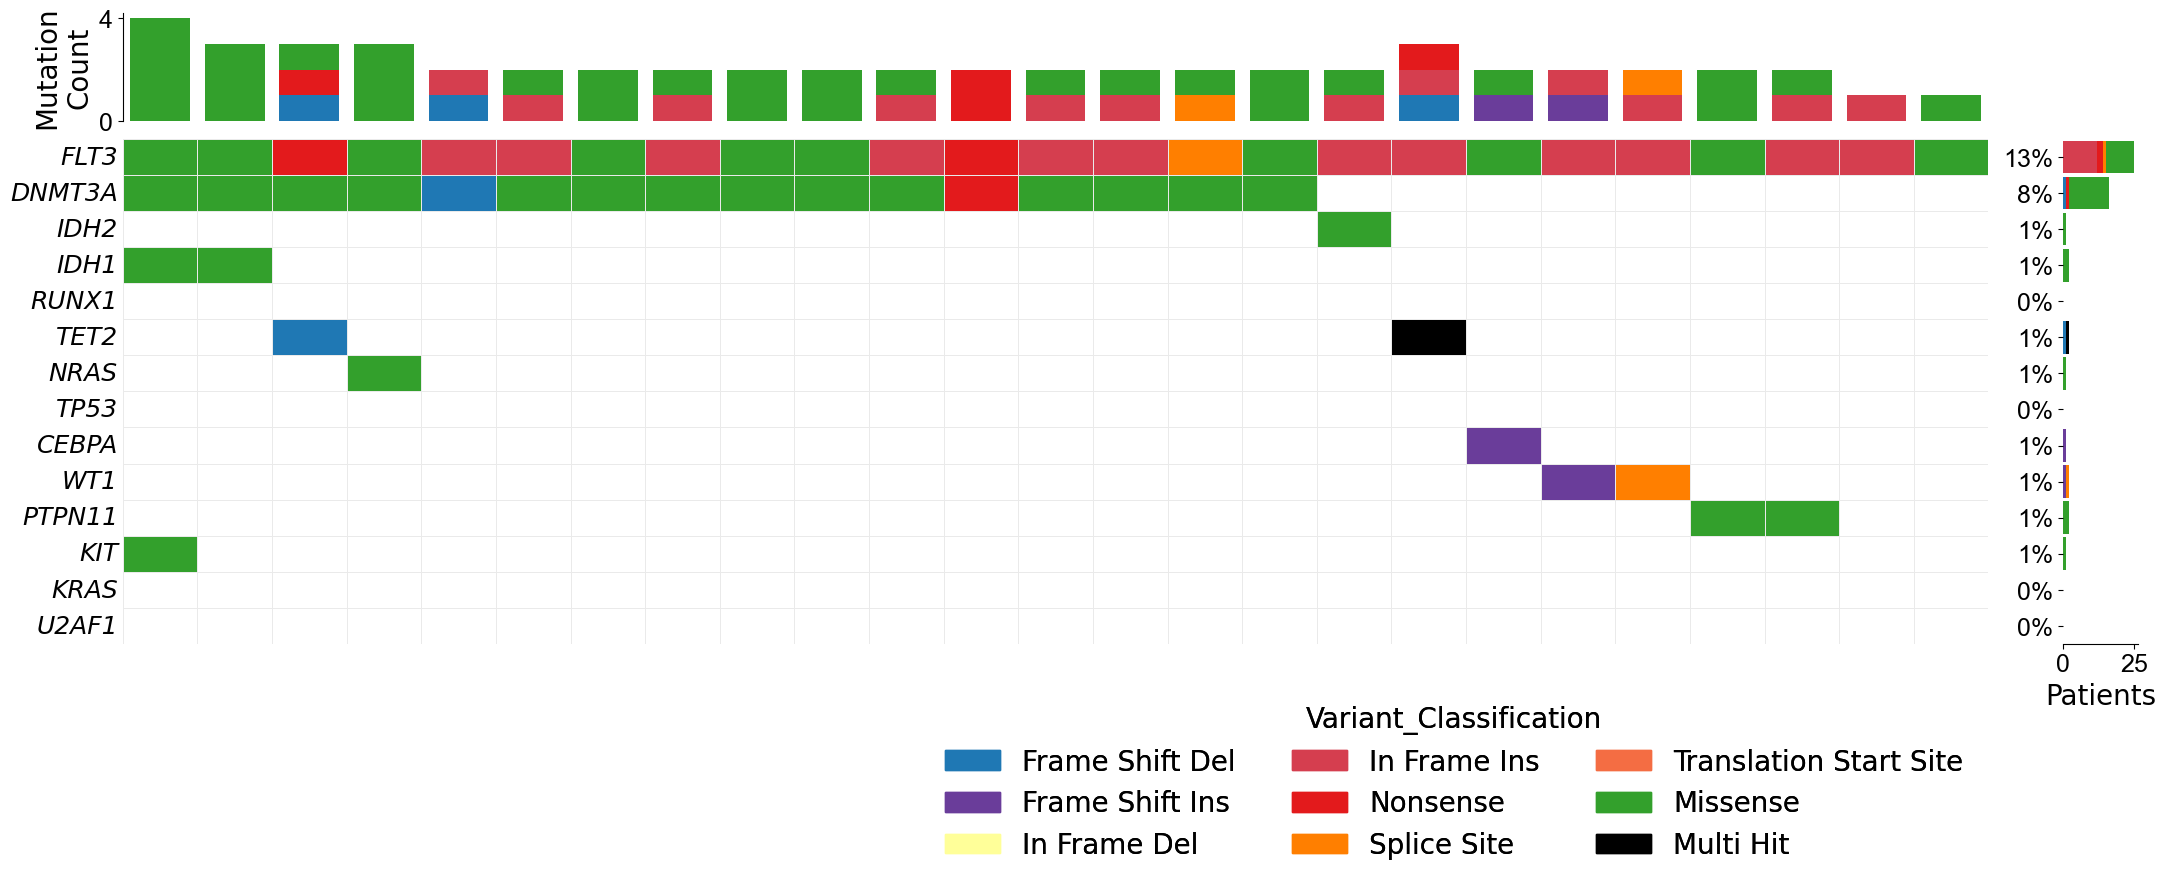

In [5]:
run_oncoplot("data/tcga_aml.maf", genes_order = genes[1:15], samples_order = samples[:25])